In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
from PIL import Image
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# def get_image_array(path):
#     folders = os.listdir(path)
#     images = []
#     labels = []
    
#     face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
#     for folder in folders:
#         newPath = path + '/' + folder
#         image_list = os.listdir(newPath)
        
#         for img in image_list:
#             img = cv2.imread(newPath + '/' + img,0)
            
#             faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
            
#             for (x, y, w, h) in faces:
#                 # Crop and resize the detected face
#                 face = img[y:y+h, x:x+w]
#                 face = cv2.resize(face, (100, 100))

#                 images.append(face)
#                 labels.append(folder)
    
#     images = np.array(images)
#     labels = np.array(labels).reshape(-1, 1)
    
#     return images, labels

In [3]:
# def get_image_array(path):
#     folder = os.listdir(path)
#     images = []
#     labels = []
#     for img in folder:
#         img = cv2.imread(path + '/' + img,0)
#         img = cv2.resize(img, (100, 100))
#         images.append(img)
#         labels.append(folder)
    
#     images = np.array(images)
#     labels = np.array(labels).reshape(-1, 1)
    
#     return images, labels

def get_image_array(path, label):
    images = []
    labels = []

    for img_path in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_path), 0)
        img = cv2.resize(img, (100, 100))
        images.append(img)
        labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels).reshape(-1, 1)
    
    return images, labels

In [4]:
male_images, male_labels = get_image_array('D:/Suchi NMIMS/Year 3/Sem 5/FOML/Male and Female face dataset/Male', 'Male')
female_images, female_labels = get_image_array('D:/Suchi NMIMS/Year 3/Sem 5/FOML/Male and Female face dataset/Female', 'Female')
print(male_images.shape, male_labels.shape)
print(female_images.shape, female_labels.shape)

(2717, 100, 100) (2717, 1)
(2698, 100, 100) (2698, 1)


In [5]:
male_train_images = male_images[:round(len(male_images)*0.8)]
female_train_images = female_images[:round(len(female_images)*0.8)]
male_train_labels = male_labels[:round(len(male_labels)*0.8)]
female_train_labels = female_labels[:round(len(female_labels)*0.8)]

male_test_images = male_images[round(len(male_images)*0.8):]
female_test_images = female_images[round(len(female_images)*0.8):]
male_test_labels = male_labels[round(len(male_labels)*0.8):]
female_test_labels = female_labels[round(len(female_labels)*0.8):]

train_images = np.concatenate((male_train_images, female_train_images), axis=0)
train_labels = np.concatenate((male_train_labels, female_train_labels), axis=0)

test_images = np.concatenate((male_test_images, female_test_images), axis=0)
test_labels = np.concatenate((male_test_labels, female_test_labels), axis=0)

print("Male training images: ", male_train_images.shape)
print("Female training images: ", female_train_images.shape)
print("Male training labels: ", male_train_labels.shape)
print("Female training labels: ", female_train_labels.shape)

print('\n')

print("Male testing images: ", male_test_images.shape)
print("Female testing images: ", female_test_images.shape)
print("Male testing labels: ", male_test_labels.shape)
print("Female testing labels: ", female_test_labels.shape)

print('\n')

print("Full training images: ", train_images.shape)
print("Full testing images: ", test_images.shape)
print("Full training labels: ", train_labels.shape)
print("Full testing labels: ", test_labels.shape)

Male training images:  (2174, 100, 100)
Female training images:  (2158, 100, 100)
Male training labels:  (2174, 1)
Female training labels:  (2158, 1)


Male testing images:  (543, 100, 100)
Female testing images:  (540, 100, 100)
Male testing labels:  (543, 1)
Female testing labels:  (540, 1)


Full training images:  (4332, 100, 100)
Full testing images:  (1083, 100, 100)
Full training labels:  (4332, 1)
Full testing labels:  (1083, 1)


In [6]:
train_images

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [142, 143, 141, ...,  36,  22,  23],
        [131, 133, 128, ...,  33,  20,  19],
        [115, 112, 115, ...,  24,  18,  16]],

       [[214, 214, 214, ..., 212, 210, 208],
        [213, 216, 218, ..., 212, 212, 210],
        [217, 217, 218, ..., 217, 214, 212],
        ...,
        [203, 206, 212, ..., 191, 190, 188],
        [202, 205, 205, ..., 187, 193, 187],
        [197, 200, 202, ..., 184, 183, 183]],

       [[104,  99,  97, ...,   0,   3,  21],
        [ 96,  97,  93, ...,   7,  21,  22],
        [ 93,  94,  92, ...,  21,  28,  35],
        ...,
        [ 46,  30,  16, ...,  55,  53,  57],
        [ 55,  16,  28, ...,  55,  45,  47],
        [ 39,  21,  67, ...,  47,  63,  62]],

       ...,

       [[215, 220, 217, ..., 222, 224, 223],
        [215, 216, 218, ..., 221, 222, 222],
        [212, 216, 218, ..., 222, 221, 223

In [7]:
test_labels

array([['Male'],
       ['Male'],
       ['Male'],
       ...,
       ['Female'],
       ['Female'],
       ['Female']], dtype='<U6')

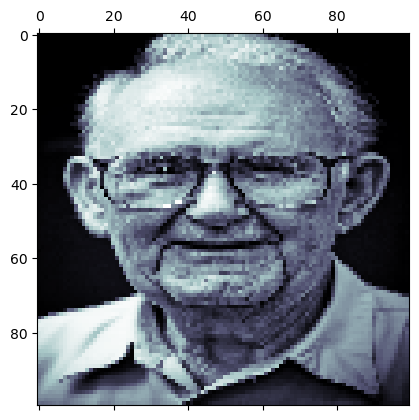

In [8]:
plt.matshow(train_images[0], cmap = plt.cm.bone)

In [9]:
fig = plt.figure(figsize=(20,20))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    ax.imshow(train_images[i], cmap=plt.cm.bone)
    ax.set_title(train_labels[i][0])
    
plt.tight_layout()  # Adjust the spacing between subplots for a cleaner layout
plt.show()

In [10]:
X1 = train_images/255.0
X2 = test_images/255.0
X_train = X1.reshape(len(train_images), train_images.shape[1]*train_images.shape[2])
X_test = X2.reshape(len(test_images), test_images.shape[1]*test_images.shape[2])
print(X_train.shape)
print(X_test.shape)

(4332, 10000)
(1083, 10000)


In [11]:
df1 = pd.DataFrame(train_labels, columns = ['labels'])
df1 = pd.get_dummies(data=df1)

df2 = pd.DataFrame(test_labels, columns = ['labels'])
df2 = pd.get_dummies(data=df2)

Y_train = df1.values
Y_test = df2.values
print(Y_train.shape, Y_test.shape)

(4332, 2) (1083, 2)


In [12]:
all_images = np.concatenate((X_train, X_test), axis=0)

In [13]:
pca = IncrementalPCA(165)
pca.fit(all_images)

IncrementalPCA(n_components=165)

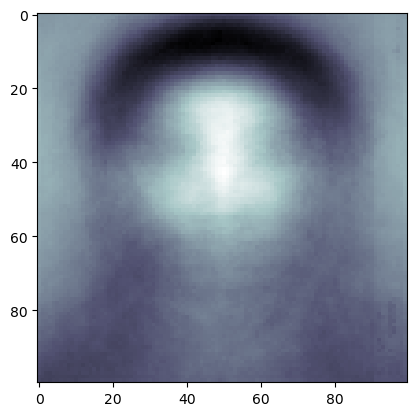

In [14]:
## Mean or Average of all images (most common)
plt.imshow(pca.mean_.reshape(train_images[0].shape), cmap=plt.cm.bone)

In [15]:
print(pca.explained_variance_ratio_.shape)
# print(pca.explained_variance_ratio_[0:100])
# print(np.sum(pca.explained_variance_ratio_[0:165]))
print(np.sum(pca.explained_variance_ratio_))

(165,)
0.9219545941184509


In [16]:
# Eigen vectors
print(pca.components_.T)
print(pca.components_.shape)
# Eigen values
print(pca.explained_variance_)

[[ 1.55308186e-02 -1.18098888e-02 -5.48425796e-03 ... -5.58205361e-03
  -4.57256955e-03 -7.52240649e-03]
 [ 1.55228522e-02 -1.22577803e-02 -5.65807142e-03 ...  8.07059282e-04
  -2.72453180e-03 -1.01001100e-02]
 [ 1.55752594e-02 -1.22851805e-02 -6.04106679e-03 ...  2.14784508e-03
  -1.04136615e-03 -1.07402861e-02]
 ...
 [ 1.10422722e-02  1.47014641e-02 -4.75817188e-03 ... -7.44245387e-03
   1.29332452e-03 -6.64648588e-03]
 [ 1.11959922e-02  1.42052387e-02 -4.97035363e-03 ... -7.93995139e-03
  -8.10058193e-03 -6.57146522e-03]
 [ 1.12240459e-02  1.33666943e-02 -5.48422853e-03 ... -7.58266803e-03
  -1.50696986e-02  6.03752109e-05]]
(165, 10000)
[290.23934064  79.43012965  47.23495572  41.67784452  27.81119428
  24.7252914   19.77724738  15.46201139  14.37794397  13.76138725
  11.42351009   9.22632348   9.05033796   8.13614437   7.42268792
   6.65877979   5.99737671   5.31913503   5.19620431   4.65939966
   4.53948406   4.27489983   3.96280877   3.8629907    3.49469882
   3.39809691   3.267

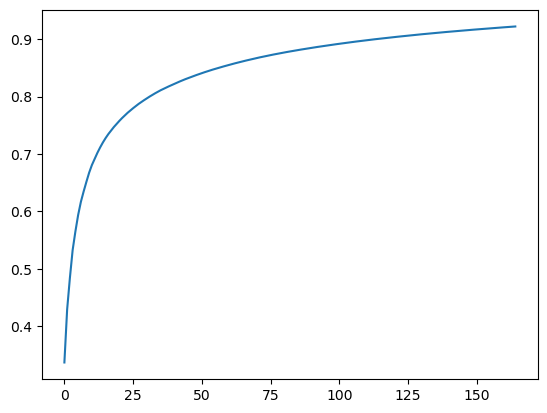

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

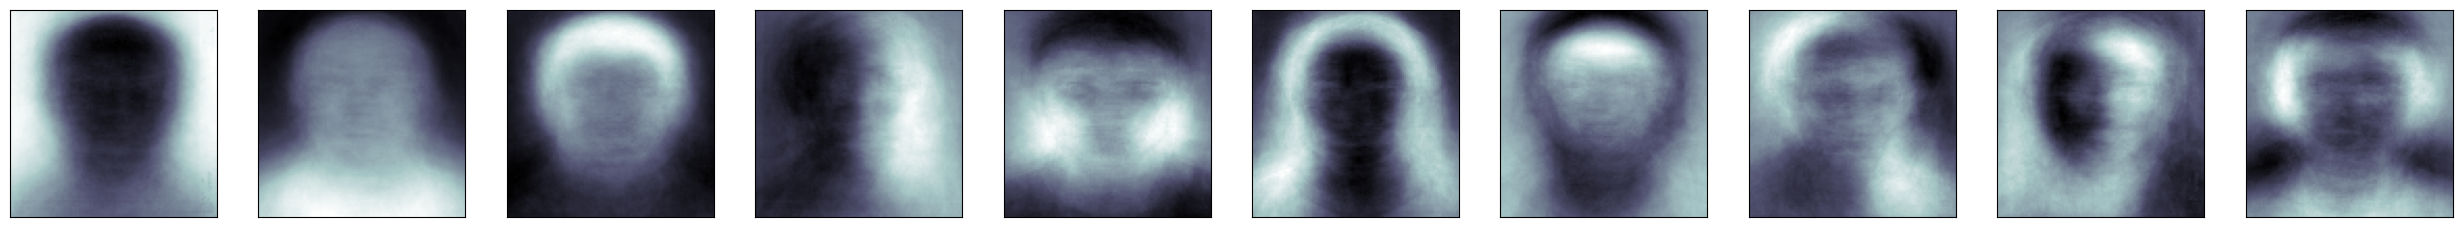

In [18]:
fig = plt.figure(figsize=(320,120))
for i in range(10):
    ax = fig.add_subplot(3, 100, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(train_images[0].shape), cmap=plt.cm.bone)

In [19]:
transformed_images = pca.transform(all_images)
print(transformed_images.shape)

(5415, 165)


(5415, 10000)


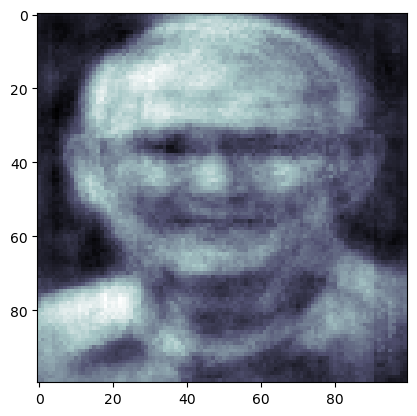

In [20]:
new_images = pca.inverse_transform(transformed_images)
print(new_images.shape)
plt.imshow(new_images[0].reshape(train_images[0].shape), cmap = plt.cm.bone)

In [21]:
X_transformed_train = transformed_images[:len(X_train)]
X_transformed_test = transformed_images[len(X_train):]
print(X_transformed_train.shape, X_transformed_test.shape)

(4332, 165) (1083, 165)


In [22]:
X_new_train = new_images[:len(X_train)]
X_new_test = new_images[len(X_train):]
print(X_new_train.shape, X_new_test.shape)

(4332, 10000) (1083, 10000)


In [23]:
# Number of components (< n_classes - 1)
lda = LDA(n_components = 1)
k = lda.fit(X_transformed_train, train_labels)
X_lda = lda.transform(X_transformed_train)
predict = lda.predict(X_transformed_train)
print(confusion_matrix(train_labels, predict))
print(accuracy_score(train_labels, predict))

[[1667  491]
 [ 518 1656]]
0.7670821791320406


C:\Users\Suchetan Ghosh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# # Number of components (< n_classes - 1)
# lda2 = LDA(n_components=6, shrinkage='auto', solver='eigen')
# k2 = lda2.fit(X_new_train, train_labels)
# X_lda = lda2.transform(X_new_train)
# predict2 = lda2.predict(X_new_train)
# print(confusion_matrix(train_labels, predict2))
# print(accuracy_score(train_labels, predict2))

In [25]:
# lda = LDA(n_components=6, shrinkage='auto', solver='lsqr')
# k = lda.fit(X_train, train_labels)
# X_lda = lda.transform(X_train)
# predict = lda.predict(X_train)
# print(confusion_matrix(train_labels, predict))
# print(accuracy_score(train_labels, predict))

In [26]:
all_labels = np.concatenate((Y_train, Y_test), axis=0)
all_labels.shape

(5415, 2)

In [68]:
model1=Sequential()
model1.add(Dense(165, activation='tanh'))
model1.add(Dense(132, activation='tanh'))
model1.add(Dense(99, activation='tanh'))
model1.add(Dense(66, activation='tanh'))
model1.add(Dense(33, activation='tanh'))
model1.add(Dense(16, activation='tanh'))
model1.add(Dense(2, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model1.fit(X_transformed_train, Y_train, epochs=100)
# model2.fit(transformed_images, all_labels, epochs=100)

Epoch 1/100
136/136 [==============================] - 1s 2ms/step - loss: 0.4746 - accuracy: 0.7740
Epoch 2/100
136/136 [==============================] - 0s 1ms/step - loss: 0.2460 - accuracy: 0.9072
Epoch 3/100
136/136 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9529
Epoch 4/100
136/136 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9725
Epoch 5/100
136/136 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.9815
Epoch 6/100
136/136 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9905
Epoch 7/100
136/136 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9912
Epoch 8/100
136/136 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9896
Epoch 9/100
136/136 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 0.9940
Epoch 10/100
136/136 [==============================] - 0s 1ms/step - loss: 0.0147 - accura

136/136 [==============================] - 0s 1ms/step - loss: 7.5716e-04 - accuracy: 0.9998
Epoch 80/100
136/136 [==============================] - 0s 1ms/step - loss: 7.4906e-04 - accuracy: 0.9998
Epoch 81/100
136/136 [==============================] - 0s 1ms/step - loss: 7.2237e-04 - accuracy: 0.9998
Epoch 82/100
136/136 [==============================] - 0s 1ms/step - loss: 7.7081e-04 - accuracy: 0.9998
Epoch 83/100
136/136 [==============================] - 0s 2ms/step - loss: 7.9801e-04 - accuracy: 0.9998
Epoch 84/100
136/136 [==============================] - 0s 1ms/step - loss: 7.3230e-04 - accuracy: 0.9998
Epoch 85/100
136/136 [==============================] - 0s 1ms/step - loss: 7.3618e-04 - accuracy: 0.9998
Epoch 86/100
136/136 [==============================] - 0s 1ms/step - loss: 7.5433e-04 - accuracy: 0.9998
Epoch 87/100
136/136 [==============================] - 0s 1ms/step - loss: 9.5746e-04 - accuracy: 0.9995
Epoch 88/100
136/136 [==============================] - 0s 

In [69]:
train_loss, train_accuracy = model2.evaluate(X_transformed_train, Y_train)
test_loss, test_accuracy = model2.evaluate(X_transformed_test, Y_test)
print(train_loss, train_accuracy)
print(test_loss, test_accuracy)

34/34 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.9991
0.0005321833887137473 0.9997691512107849
0.0019585692789405584 0.9990766644477844


In [70]:
y_pred = model2.predict(X_transformed_train)
y_pred = (y_pred>0.5).astype(float)
print(confusion_matrix(Y_train.argmax(axis=1), y_pred.argmax(axis=1)))
print(classification_report(Y_train.argmax(axis=1), y_pred.argmax(axis=1), digits=5))
print(accuracy_score(Y_train.argmax(axis=1), y_pred.argmax(axis=1)))

136/136 [==============================] - 0s 652us/step
[[2157    1]
 [   0 2174]]
              precision    recall  f1-score   support

           0    1.00000   0.99954   0.99977      2158
           1    0.99954   1.00000   0.99977      2174

    accuracy                        0.99977      4332
   macro avg    0.99977   0.99977   0.99977      4332
weighted avg    0.99977   0.99977   0.99977      4332

0.9997691597414589


In [71]:
y_pred2 = model2.predict(X_transformed_test)
y_pred2 = (y_pred2>0.5).astype(float)
print(confusion_matrix(Y_test.argmax(axis=1), y_pred2.argmax(axis=1)))
print(classification_report(Y_test.argmax(axis=1), y_pred2.argmax(axis=1), digits=5))
print(accuracy_score(Y_test.argmax(axis=1), y_pred2.argmax(axis=1)))

34/34 [==============================] - 0s 994us/step
[[539   1]
 [  0 543]]
              precision    recall  f1-score   support

           0    1.00000   0.99815   0.99907       540
           1    0.99816   1.00000   0.99908       543

    accuracy                        0.99908      1083
   macro avg    0.99908   0.99907   0.99908      1083
weighted avg    0.99908   0.99908   0.99908      1083

0.9990766389658357


In [72]:
# y_pred3 = model.predict(X_train)
# y_pred3 = (y_pred3>0.5).astype(float)
# print(confusion_matrix(Y_train.argmax(axis=1), y_pred3.argmax(axis=1)))
# print(classification_report(Y_train.argmax(axis=1), y_pred3.argmax(axis=1), digits=5))
# print(accuracy_score(Y_train.argmax(axis=1), y_pred3.argmax(axis=1)))

In [73]:
img = cv2.imread("D:/Suchi NMIMS/Year 3/Sem 5/FOML/Face Check Images/3.jpg",0)
img = cv2.resize(img, (100, 100))
img2 = img/255.0
img3 = img2.reshape(1, img.shape[0]*train_images.shape[1])
new_img = pca.transform(img3)
new_img.shape

(1, 165)

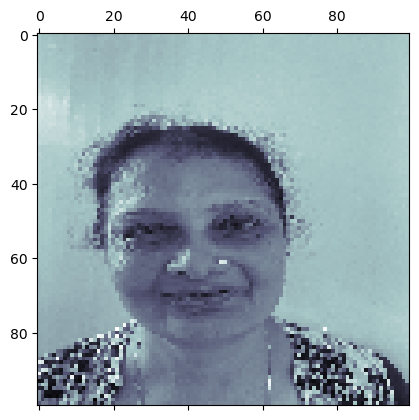

In [74]:
plt.matshow(img, cmap = plt.cm.bone)

In [75]:
y_new_pred = model2.predict(new_img)
y_new_pred2 = (y_new_pred>0.5).astype(float)
print(y_new_pred)
print(y_new_pred2)

1/1 [==============================] - 0s 16ms/step
[[9.999900e-01 9.091323e-06]]
[[1. 0.]]


In [87]:
img = cv2.imread("D:/Suchi NMIMS/Year 3/Sem 5/FOML/Face Check Images/20.jpeg",0)
img = cv2.resize(img, (100, 100))
img2 = img/255.0
img3 = img2.reshape(1, img.shape[0]*train_images.shape[1])
new_img = pca.transform(img3)
y_new_pred = model2.predict(new_img)
y_new_pred2 = (y_new_pred>0.5).astype(float)
print(y_new_pred)
print(y_new_pred2)

1/1 [==============================] - 0s 30ms/step
[[9.9999297e-01 7.6149036e-06]]
[[1. 0.]]


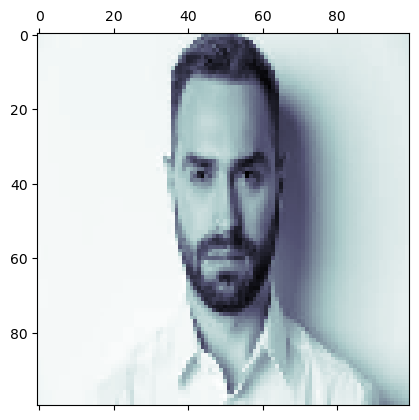

In [88]:
plt.matshow(img, cmap = plt.cm.bone)

In [65]:
# model2.save('GenModel')
# import pickle
# with open('gen_pca.pkl', 'wb') as pickle_file:
#     pickle.dump(pca, pickle_file)

INFO:tensorflow:Assets written to: GenModel\assets


INFO:tensorflow:Assets written to: GenModel\assets
